In [1]:
from pathlib import Path
import sys
sys.path.append(str(Path().resolve().parent))

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import pandas as pd

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
x = df.loc[:,["petal length (cm)", "petal width (cm)"]]
x_train, x_test, y_train, y_test = train_test_split(
    x, iris.target, test_size=0.25, random_state=0
)
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

In [3]:
from scikit_quri.circuit import create_ibm_embedding_circuit
from scikit_quri.qsvm import QSVC
n_qubit = 4
circuit = create_ibm_embedding_circuit(n_qubit)
from quri_parts.qiskit.backend import QiskitSamplingBackend
from qiskit_aer import AerSimulator
qsvm = QSVC(circuit,sim=True)
qsvm.fit(x_train, y_train,QiskitSamplingBackend(backend=AerSimulator()),n_shots=10)
y_pred = qsvm.predict(x_test)

 111/112
 37/38


d:\github\scikit-quri\pyenv\Lib\site-packages\quri_parts\qiskit\backend\utils.py:68: UserWarning: No max_shots setting is found. The max shot is set to default value 1000000
  warnings.warn(


y_pred=array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])
y_test=array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])
f1_score=0.9473684210526315


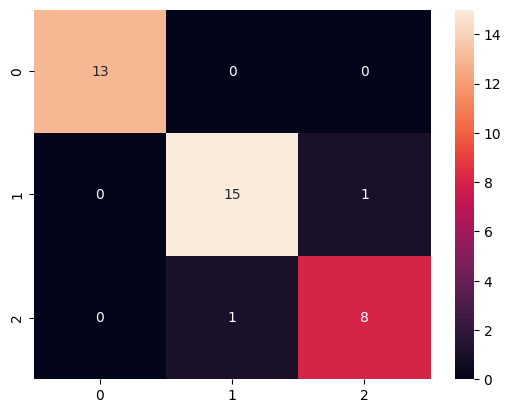

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
print(f"{y_pred=}")
print(f"{y_test=}")

print(f"f1_score={f1_score(y_test, y_pred, average='weighted')}")